In [1]:
import oceanbench

oceanbench.__version__

'0.0.1a0'

### Open challenger datasets

> Insert here the code that opens the challenger datasets as `challenger_datasets: List[xarray.Dataset]`

In [2]:
# Open GLONET forecast sample with xarray
from functools import reduce
import xarray
from typing import List

LATITUDE_CLIMATE_FORECAST_ATTRIBUTES = {
    "standard_name": "latitude",
    "long_name": "Latitude",
    "units": "degrees_north",
    "units_long": "Degrees North",
    "axis": "Y",
}

LONGITUDE_CLIMATE_FORECAST_ATTRIBUTES = {
    "standard_name": "longitude",
    "long_name": "Longitude",
    "units": "degrees_east",
    "units_long": "Degrees East",
    "axis": "X",
}

DEPTH_CLIMATE_FORECAST_ATTRIBUTES = {
    "standard_name": "depth",
    "long_name": "Depth",
    "units": "m",
    "units_long": "Meters",
}

TIME_CLIMATE_FORECAST_ATTRIBUTES = {
    "standard_name": "time",
    "long_name": "Time",
    "axis": "T",
}

TEMPERATURE_CLIMATE_FORECAST_ATTRIBUTES = {
    "standard_name": "sea_water_potential_temperature",
}

SALINITY_CLIMATE_FORECAST_ATTRIBUTES = {
    "standard_name": "sea_water_salinity",
}

HEIGHT_CLIMATE_FORECAST_ATTRIBUTES = {
    "standard_name": "sea_surface_height_above_geoid",
}

NORTHWARD_VELOCITY_CLIMATE_FORECAST_ATTRIBUTES = {
    "standard_name": "northward_sea_water_velocity",
}

EASTWARD_VELOCITY_CLIMATE_FORECAST_ATTRIBUTES = {
    "standard_name": "eastward_sea_water_velocity",
}


def _update_variable_attributes(
    dataset: xarray.Dataset,
    variable_name_and_attributes: tuple[str, dict[str, str]],
) -> xarray.Dataset:
    variable_name, attributes = variable_name_and_attributes
    dataset[variable_name].attrs = attributes
    return dataset


def _add_climate_forecast_attributes(
    dataset: xarray.Dataset,
) -> xarray.Dataset:
    return reduce(
        _update_variable_attributes,
        zip(
            ["lat", "lon", "depth", "time", "thetao", "so", "zos", "vo", "uo"],
            [
                LATITUDE_CLIMATE_FORECAST_ATTRIBUTES,
                LONGITUDE_CLIMATE_FORECAST_ATTRIBUTES,
                DEPTH_CLIMATE_FORECAST_ATTRIBUTES,
                TIME_CLIMATE_FORECAST_ATTRIBUTES,
                TEMPERATURE_CLIMATE_FORECAST_ATTRIBUTES,
                SALINITY_CLIMATE_FORECAST_ATTRIBUTES,
                HEIGHT_CLIMATE_FORECAST_ATTRIBUTES,
                NORTHWARD_VELOCITY_CLIMATE_FORECAST_ATTRIBUTES,
                EASTWARD_VELOCITY_CLIMATE_FORECAST_ATTRIBUTES,
            ],
        ),
        dataset,
    )


challenger_datasets: List[xarray.Dataset] = [
    _add_climate_forecast_attributes(
        xarray.open_dataset(
            "https://minio.dive.edito.eu/project-glonet/public/glonet_reforecast_2024/2024-01-03.zarr",
            engine="zarr",
        )
    )
]


### Evaluation of challenger datasets using OceanBench

#### Root Mean Square Error (RMSE) of variables compared to GLORYS

In [3]:
oceanbench.metrics.rmse_of_variables_compared_to_glorys(challenger_datasets)

,Lead day 1,Lead day 2,Lead day 3,Lead day 4,Lead day 5,Lead day 6,Lead day 7,Lead day 8,Lead day 9,Lead day 10
Surface height,0.072550,0.072811,0.072279,0.074205,0.077055,0.077814,0.080816,0.080644,0.084408,0.085529
Surface temperature,0.659611,0.675301,0.725245,0.724560,0.805426,0.807227,0.888620,0.869715,0.944387,0.925018
Surface salinity,0.792587,0.790434,0.795696,0.792178,0.787018,0.781515,0.780387,0.776530,0.778576,0.771986
Surface northward velocity,0.116657,0.119014,0.122878,0.123277,0.125830,0.127524,0.132315,0.133787,0.139171,0.139889
Surface eastward velocity,0.117798,0.120017,0.123027,0.124172,0.128817,0.130287,0.134783,0.134989,0.139812,0.143858
50m temperature,0.966279,0.981624,1.003170,1.022845,1.060496,1.097911,1.136152,1.187038,1.216651,1.282137
50m salinity,0.350590,0.350406,0.358510,0.359323,0.364514,0.365943,0.370236,0.371366,0.375886,0.378222
50m northward velocity,0.107193,0.107600,0.106828,0.107995,0.109449,0.111846,0.114489,0.117098,0.118402,0.120405
50m eastward velocity,0.108636,0.109575,0.109599,0.110640,0.112196,0.114510,0.117032,0.119348,0.122307,0.126167
200m temperature,0.830070,0.835607,0.839491,0.843784,0.842975,0.854395,0.860074,0.873203,0.882551,0.896545


#### Root Mean Square Error (RMSE) of Mixed Layer Depth (MLD) compared to GLORYS

In [4]:
oceanbench.metrics.rmse_of_mixed_layer_depth_compared_to_glorys(challenger_datasets)

/root/micromamba/envs/oceanbench_test/lib/python3.13/site-packages/xarray/core/computation.py:824: RuntimeWarning: invalid value encountered in pot_rho_t_exact
  result_data = func(*input_data)


,Lead day 1,Lead day 2,Lead day 3,Lead day 4,Lead day 5,Lead day 6,Lead day 7,Lead day 8,Lead day 9,Lead day 10
Mixed layer depth,37.780457,38.860031,40.937317,42.40871,44.580612,46.11105,47.485626,48.836586,49.344837,51.00172


#### Root Mean Square Error (RMSE) of geostrophic current compared to GLORYS

In [5]:
oceanbench.metrics.rmse_of_geostrophic_currents_compared_to_glorys(challenger_datasets)

/home/github-runner/actions-runner/_work/oceanbench/oceanbench/oceanbench/core/geostrophic_currents.py:32: RuntimeWarning: divide by zero encountered in divide
  eastward_geostrophic_velocity = -g / f[:, numpy.newaxis] * dssh_dy
/home/github-runner/actions-runner/_work/oceanbench/oceanbench/oceanbench/core/geostrophic_currents.py:32: RuntimeWarning: invalid value encountered in multiply
  eastward_geostrophic_velocity = -g / f[:, numpy.newaxis] * dssh_dy
/home/github-runner/actions-runner/_work/oceanbench/oceanbench/oceanbench/core/geostrophic_currents.py:33: RuntimeWarning: divide by zero encountered in divide
  northward_geostrophic_velocity = g / f[:, numpy.newaxis] * dssh_dx
/home/github-runner/actions-runner/_work/oceanbench/oceanbench/oceanbench/core/geostrophic_currents.py:33: RuntimeWarning: invalid value encountered in multiply
  northward_geostrophic_velocity = g / f[:, numpy.newaxis] * dssh_dx


/home/github-runner/actions-runner/_work/oceanbench/oceanbench/oceanbench/core/geostrophic_currents.py:32: RuntimeWarning: divide by zero encountered in divide
  eastward_geostrophic_velocity = -g / f[:, numpy.newaxis] * dssh_dy
/home/github-runner/actions-runner/_work/oceanbench/oceanbench/oceanbench/core/geostrophic_currents.py:32: RuntimeWarning: invalid value encountered in multiply
  eastward_geostrophic_velocity = -g / f[:, numpy.newaxis] * dssh_dy
/home/github-runner/actions-runner/_work/oceanbench/oceanbench/oceanbench/core/geostrophic_currents.py:33: RuntimeWarning: divide by zero encountered in divide
  northward_geostrophic_velocity = g / f[:, numpy.newaxis] * dssh_dx
/home/github-runner/actions-runner/_work/oceanbench/oceanbench/oceanbench/core/geostrophic_currents.py:33: RuntimeWarning: invalid value encountered in multiply
  northward_geostrophic_velocity = g / f[:, numpy.newaxis] * dssh_dx


,Lead day 1,Lead day 2,Lead day 3,Lead day 4,Lead day 5,Lead day 6,Lead day 7,Lead day 8,Lead day 9,Lead day 10
Northward geostrophic velocity,0.178016,0.167853,0.222369,0.213229,0.257189,0.252767,0.285716,0.288286,0.312349,0.323785
Eastward geostrophic velocity,0.146785,0.152147,0.177604,0.181485,0.199707,0.210587,0.224485,0.237583,0.253034,0.271508


#### Density analysis

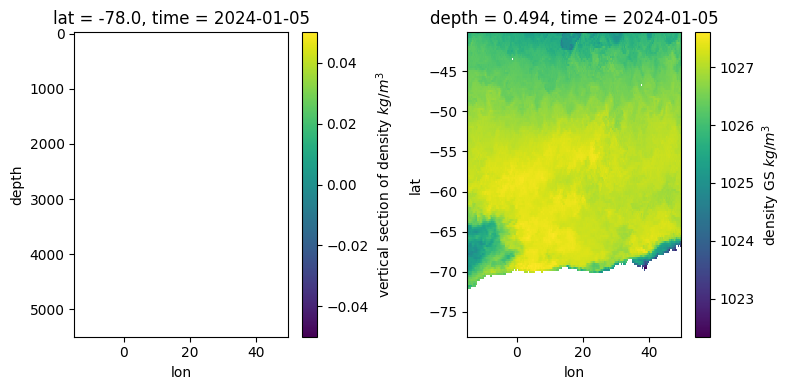

In [6]:
oceanbench.derived_quantities.density(challenger_datasets)

#### Euclidean distance to GLORYS reference

466
start


INFO: Output files are stored in tst.zarr.


<class 'numpy.ndarray'>


466
start


INFO: Output files are stored in tst.zarr.


<class 'numpy.ndarray'>


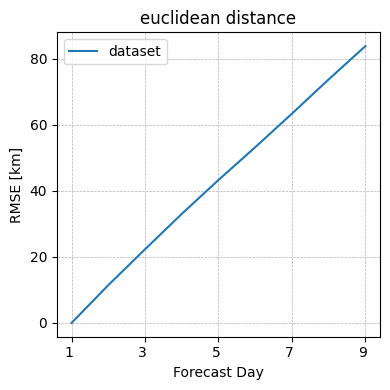

In [7]:
oceanbench.metrics.euclidean_distance_to_glorys(challenger_datasets)

#### Energy cascading analysis

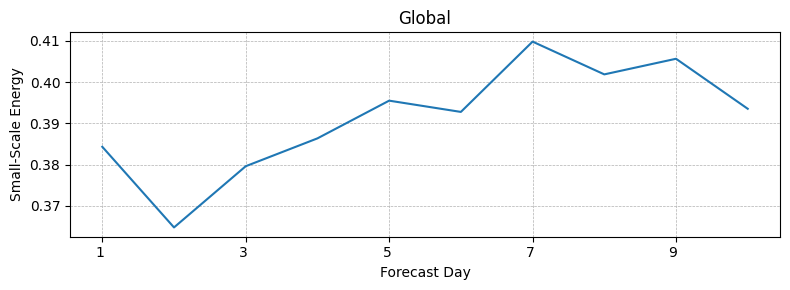

In [8]:
oceanbench.metrics.energy_cascade(challenger_datasets)

#### Kinetic energy analysis

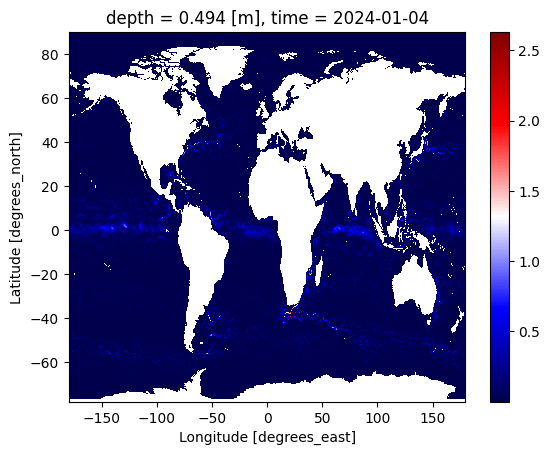

In [9]:
oceanbench.derived_quantities.kinetic_energy(challenger_datasets)

#### Vorticity analysis

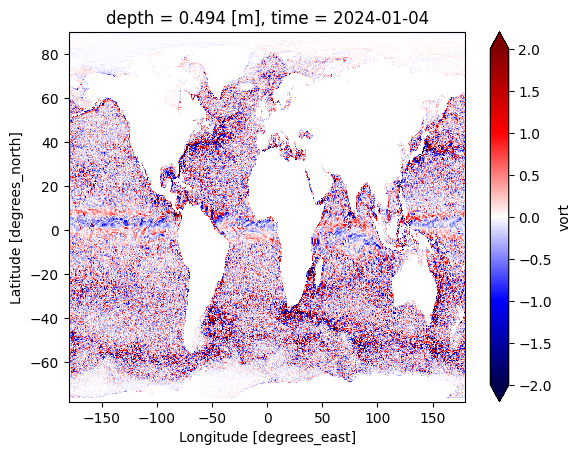

In [10]:
oceanbench.derived_quantities.vorticity(challenger_datasets)

#### Mass conservation analysis

In [11]:
oceanbench.derived_quantities.mass_conservation(challenger_datasets)

[-1.03391335e-08 -1.28428394e-08 -1.16979252e-08 -1.41945821e-08
 -1.54307116e-08 -9.51230823e-09 -1.20808228e-08 -1.08712131e-08
 -1.52097767e-08 -1.30613604e-08]
